In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
r = np.arange(0,2,0.01)
theta = 2*np.pi*r

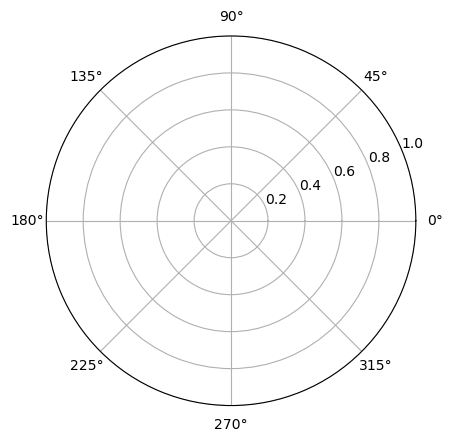

In [3]:
ax = plt.subplot(projection = 'polar')

In [4]:
N = 100
r = 2*np.random.rand(N)
r

array([1.54974445, 1.47746274, 1.83764125, 0.20993058, 0.42269799,
       0.82679328, 1.91456949, 0.49266975, 0.09266059, 1.80446549,
       0.53059236, 1.06335287, 1.37237516, 1.3918535 , 0.54143596,
       0.44423498, 1.89631206, 0.1994115 , 1.53414528, 1.69199968,
       1.18956316, 0.42457447, 1.5351932 , 0.45632678, 1.71718883,
       0.23144153, 1.42390993, 0.10420708, 1.7506412 , 0.80697542,
       0.53378708, 1.87997855, 1.8959078 , 0.17659337, 0.57617169,
       1.88272169, 0.84889664, 0.30296096, 1.65386302, 1.45440766,
       1.55905556, 1.75212699, 1.76647622, 1.38661824, 1.58350806,
       1.42747566, 1.48781469, 0.88470634, 1.26204879, 0.41772422,
       1.3233422 , 1.04051091, 1.7916632 , 0.64536986, 1.94068542,
       0.1235618 , 1.02976957, 0.70561307, 0.70113999, 1.48426648,
       0.47097056, 0.41590281, 1.01601426, 1.22766655, 1.39746144,
       1.47639613, 0.82055064, 1.69627879, 1.47010739, 1.35435973,
       0.04678524, 0.74833118, 0.52063702, 0.1602385 , 1.36632

In [10]:
theta = 2*np.pi*np.random.rand(N)

area = 50*np.pi*(r**2)

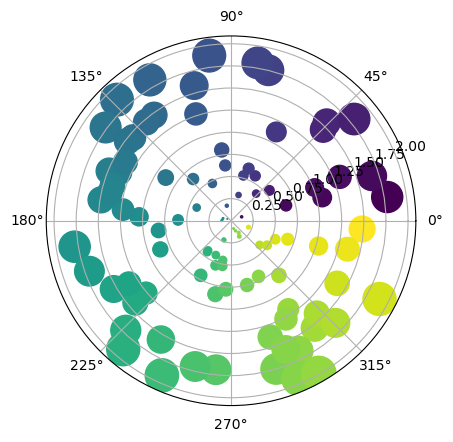

In [13]:
ax = plt.subplot(projection='polar')
ax.scatter(theta, r, s = area, c=theta)

In [17]:
df = pd.read_csv('nyc_temp.csv', parse_dates=['date'])
df

,date,temp
0,1869-01-01,-17
1,1869-01-02,-28
2,1869-01-03,17
3,1869-01-04,28
4,1869-01-05,61
...,...,...
3645,1878-12-27,-17
3646,1878-12-28,-11
3647,1878-12-29,39
3648,1878-12-30,0


In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3650 entries, 0 to 3649
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   date    3650 non-null   datetime64[ns]
 1   temp    3650 non-null   int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 57.2 KB


In [36]:
from statsmodels.tsa.seasonal import seasonal_decompose as sd

In [30]:
df.set_index('date', inplace=True)

<Axes: xlabel='date'>

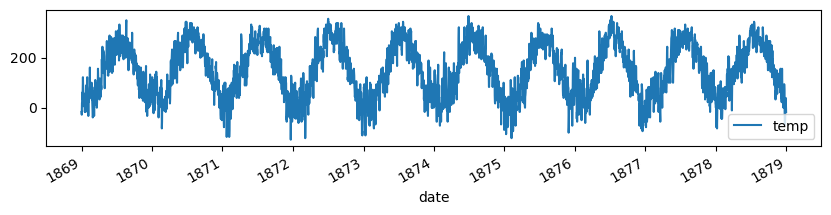

In [31]:
df.plot(figsize=(10,2))

In [ ]:
result = sd(df['temp'], period=365) # 일별 데이터 (월별 데이터고 1년 주기면 12)

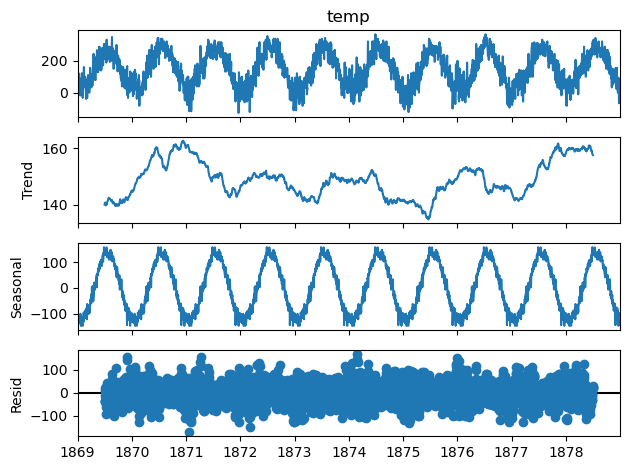

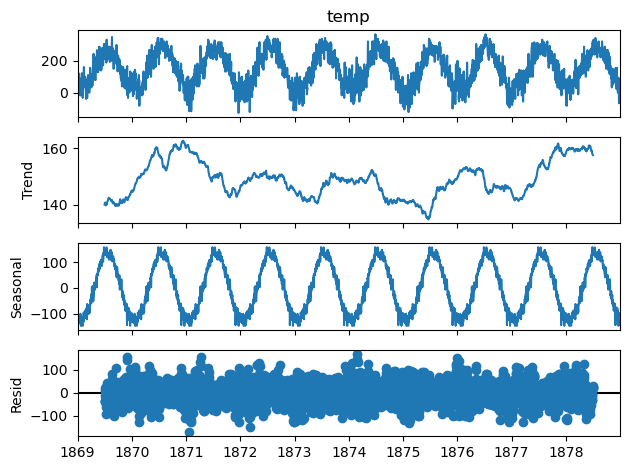

In [41]:
result.plot()

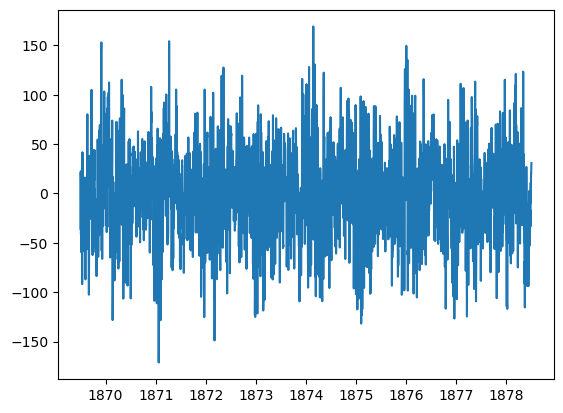

In [42]:
plt.plot(result.resid)
# residual 잔차분석

In [ ]:
# flights의 passengers를 시계열 분해한 후 그래프를 그려 해석하시오.

flights = sns.load_dataset('flights')
flights

,year,month,passengers
0,1949,Jan,112
1,1949,Feb,118
2,1949,Mar,132
3,1949,Apr,129
4,1949,May,121
...,...,...,...
139,1960,Aug,606
140,1960,Sep,508
141,1960,Oct,461
142,1960,Nov,390


In [54]:
flights.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   year        144 non-null    int64   
 1   month       144 non-null    category
 2   passengers  144 non-null    int64   
dtypes: category(1), int64(2)
memory usage: 2.9 KB


In [55]:
passengers = sd(flights['passengers'], period=12)

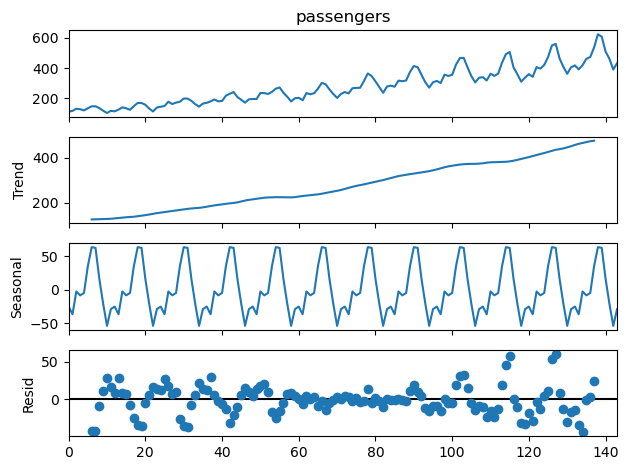

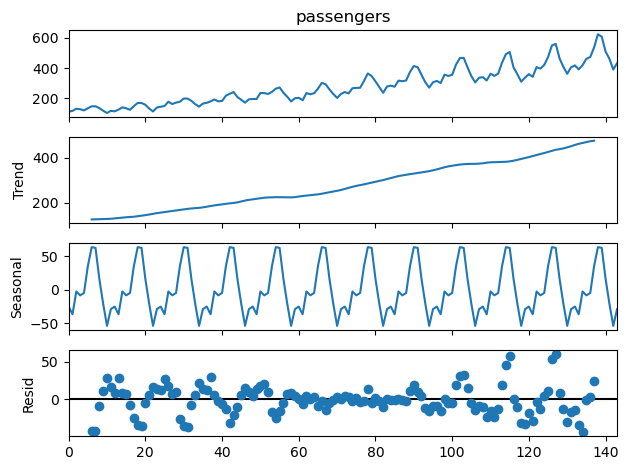

In [ ]:
passengers.plot()

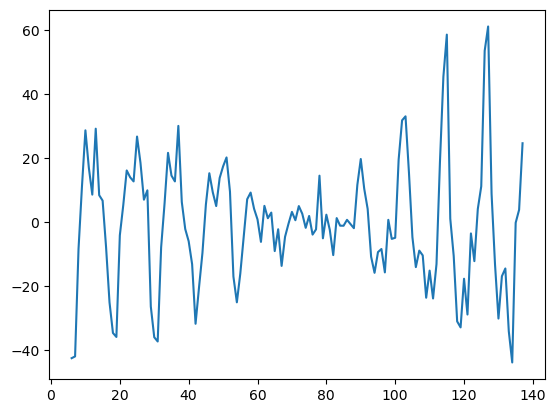

In [60]:
plt.plot(passengers.resid)